<div style="background-color:#80ced6">
<br>
<p style="text-align: center; font-size:28px; font-family: 'Times New Roman'">
COSC 4409 Big Data Technologies<br><br>
Project #1<br></p>
<p style="text-align: center; font-size:20px; font-family: 'Times New Roman'">
Due date: Thursday, 03/18/2021</p>
<br>
</div>

#### Datasets: `youtube_trending.csv` and `category.json` 

<p style="font-size:16px">
This dataset includes several months of data on daily trending YouTube videos. Data includes the video_id, video title, trending date, channel title, category_id, publish time, tags, views, likes and dislikes, comment count, thumbnail_link, comment_disabled, ratinngs_disabled, video_error_or_removed, and description. Find the category name using category_id in <mark>category.json</mark> file.
</p>

### Import libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")

### Import dataset

In [66]:
df = pd.read_csv('youtube_trending.csv')
cat = pd.read_json('category_id.json')

In [67]:
df.tail() # helps me understand the data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...
40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...


### Explore your data
<p style="font-size:16px">
What are the columns? how many rows? any null values? data transform and wrangling needed?
</p>

In [68]:
df.dtypes
##- need to transform:
##  - video_id, title, channel title, tags, description to string
##  - publishtime, trending date to datetime objec

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

### Transform data to correct types

In [69]:
# use here to convert to date time objects if need

### filling any null values

In [70]:
# find any null values
print(' number of null objects in df: ' + str(df.isnull().sum()))

 number of null objects in df: video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64


In [71]:
# finding the number of distinct objects in video_id
print('number of items before duplicates are dropped: ' + str(df.video_id.count()))
df = df.drop_duplicates(subset=['video_id'], keep='first')
print('number of items after duplicates are dropped: ' + str(df.video_id.count()))

number of items before duplicates are dropped: 40949
number of items after duplicates are dropped: 6351


<p style="font-size:24px">
Answer the following questions:
</p>

### 1. How many distinct videos?

In [72]:
# printing the number of distinct videos in youtube trending dataset.
print('Number of distinct videos: ' + str(df.video_id.count()))

Number of distinct videos: 6351


### 2. Find the 5 most likes video related to Robotics. Use subplots to compare their number of views, dislikes, and comments.

#### In the following I used horizontal bar charts because they looked much nicer than vertical

In [73]:
# search tags for robotics, robots and something else
robotics = df[df['tags'].str.contains('robot')]
#robotics.head()
robotics_sorted = robotics.sort_values(by=['likes'], ascending=False)
robotics_top_5 = robotics_sorted.iloc[0:5, :]
print("The top 5 videos related to robotics: ")
robotics_top_5

The top 5 videos related to robotics: 


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
12601,P3Bd3HUMkyU,18.18.01,First Look at Nintendo Labo,Nintendo,20,2018-01-17T22:00:05.000Z,"nintendo|""play""|""play nintendo""|""game""|""gamepl...",2835938,117833,13921,36058,https://i.ytimg.com/vi/P3Bd3HUMkyU/default.jpg,False,False,False,"Get ready to Make, Play and Discover with Nint..."
600,fRj34o4hN4I,17.17.11,"What's new, Atlas?",BostonDynamics,28,2017-11-16T21:12:25.000Z,"Robotics|""Humanoid Robots""|""Legged Locomotion""...",1603415,65594,700,12169,https://i.ytimg.com/vi/fRj34o4hN4I/default.jpg,False,False,False,"What have you been up to lately, Atlas?"
10420,vXBfwgwT1nQ,18.05.01,ARCADE SCAM SCIENCE (not clickbait),Mark Rober,28,2018-01-03T20:57:20.000Z,"arcade|""scam""|""science""|""cyclone""|""arcade scam...",1145295,51145,557,2416,https://i.ytimg.com/vi/vXBfwgwT1nQ/default.jpg,False,False,False,"Don't feel bad. You don't suck, the game make..."
26751,Ml9v3wHLuWI,18.30.03,Will Smith Tries Online Dating,Will Smith,24,2018-03-29T18:10:37.000Z,"comedy|""entertainment""|""will smith""|""will""|""sm...",851859,50203,960,4952,https://i.ytimg.com/vi/Ml9v3wHLuWI/default.jpg,False,False,False,Things get awkward when Will meets Sophia the ...
34151,vjSohj-Iclc,18.12.05,"Getting some air, Atlas?",BostonDynamics,28,2018-05-10T19:56:28.000Z,"Dynamic robots|""Boston Dynamics""|""humanoid rob...",2809121,47709,1013,6563,https://i.ytimg.com/vi/vjSohj-Iclc/default.jpg,False,False,False,NaN


Text(0.5, 1.0, 'Comparing Comments between the op 5 robotics videos')

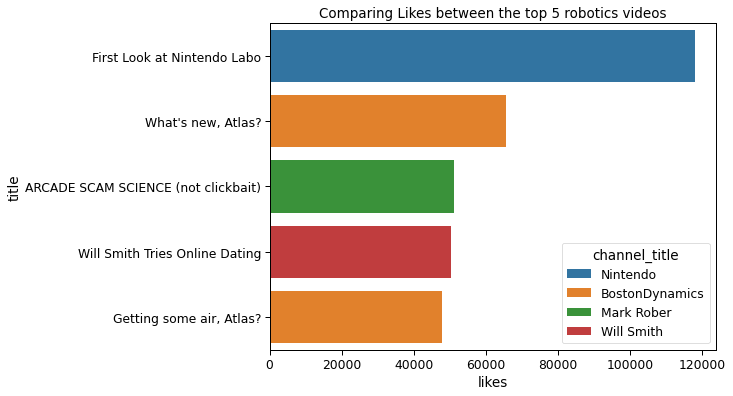

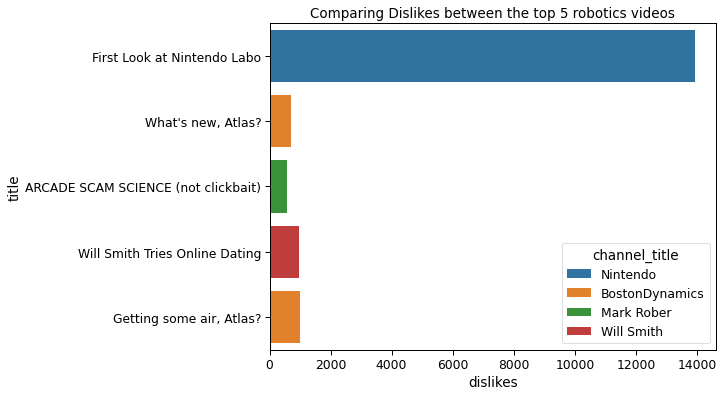

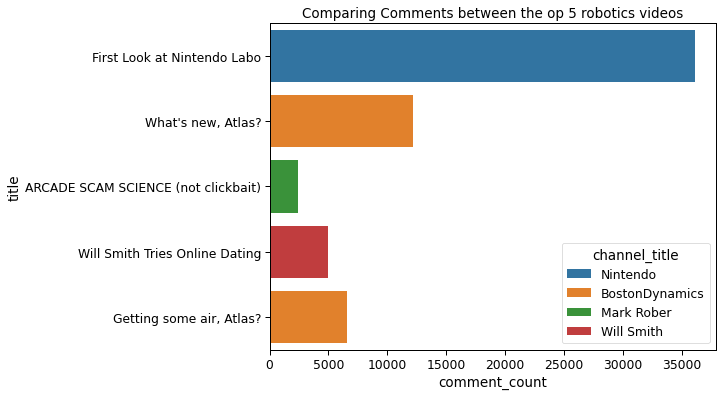

In [74]:
# subplotting the data of robotics top 5

# comparing the number of likes
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
bar = sns.barplot(y='title',x='likes',data=robotics_top_5, hue='channel_title', estimator=np.median, dodge=False, orient='h')
bar.set_title('Comparing Likes between the top 5 robotics videos')

plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
dislikes = sns.barplot(y='title',x='dislikes',data=robotics_top_5, hue='channel_title', estimator=np.median, dodge=False, orient='h')
dislikes.set_title('Comparing Dislikes between the top 5 robotics videos')

plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
comments = sns.barplot(y='title',x='comment_count',data=robotics_top_5, hue='channel_title', estimator=np.median, dodge=False, orient='h')
comments.set_title('Comparing Comments between the op 5 robotics videos')

### 3. What is the mean views, likes, dislikes, and comment_count per (distinct) video

In [75]:
def get_stats(df):
    print("Mean views, likes dislikes, and comment count per distinct video \n")
    print('Mean Likes: ' + str(df.likes.mean()))
    print('Mean Dislikes: ' + str(df.dislikes.mean()))
    print('Mean Comment Count ' + str(df.comment_count.mean()))
    
get_stats(df)

Mean views, likes dislikes, and comment count per distinct video 

Mean Likes: 34493.569831522596
Mean Dislikes: 1427.2220122815304
Mean Comment Count 4501.707290190521


### 4. Add a column `category_name` to the DataFrame imported from `youtube_trending.csv`. 
**Note:** The category name stored at items -> snipped -> title in the `category_id.json` file

In [76]:
import json

with open('category_id.json') as cats:
    cat = json.load(cats)
    
    cat_len = len(cat['items'])
    print(cat_len)
    category_name = list()
    for x in df.category_id:
        try:
            category_name.append(cat['items'][x-13]['snippet']['title'])
        except IndexError:
            category_name.append('no category')
    
df['category_name'] = category_name
df.head()

32


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


### 5. Which channels have the largest number of trending videos?
<br><font face="Times New Roman" size='4'>Draw a bar graph: (Number of videos) X (Channel)</font>

Text(0.5, 0, 'Number of Videos')

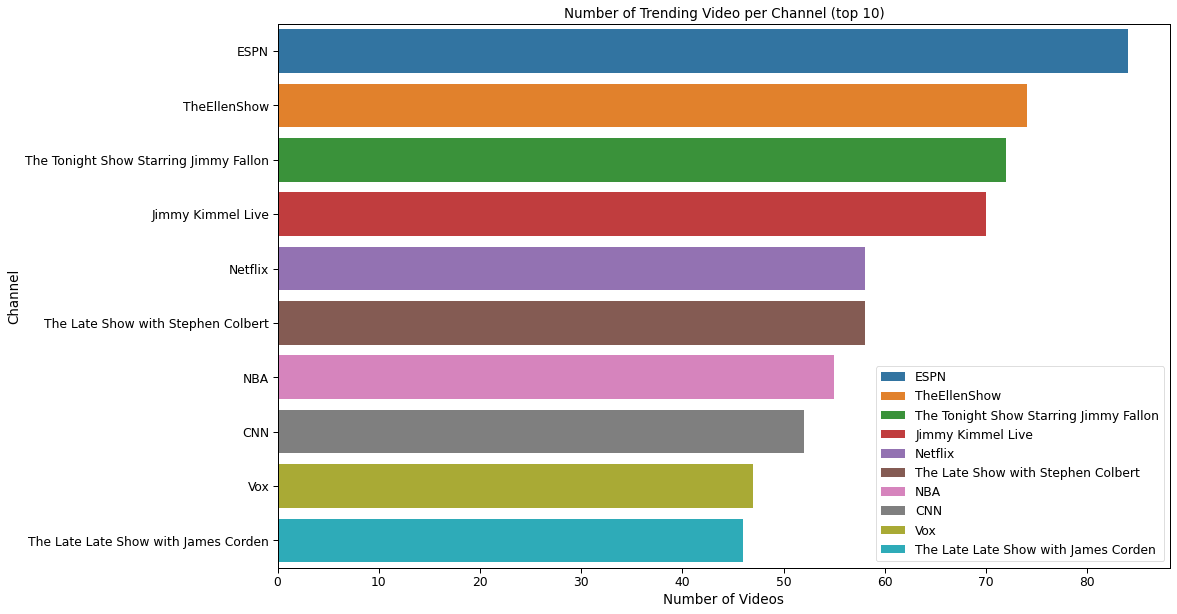

In [77]:
# make new dataframe: 
# channel, number of videos
num_videos = dict(df.channel_title.value_counts())


trending = list(num_videos.values())
y_plot = trending[0:10]

channel = list(num_videos.keys())
x_plot = channel[0:10]


plt.figure(figsize=(16,10))
trending = sns.barplot(x=y_plot, y=x_plot, estimator=np.median, hue=x_plot, dodge=False, orient='h')
trending.set_title( "Number of Trending Video per Channel (top 10)") 
# This will add label to X-axis 
trending.set_ylabel( "Channel")
trending.set_xlabel('Number of Videos')


### 6. Which video category has the largest number of trending videos?
<br><font face="Times New Roman" size='4'>Draw a bar graph: (Number of videos) X (Category)</font>

Text(0.5, 0, 'Number of Videos')

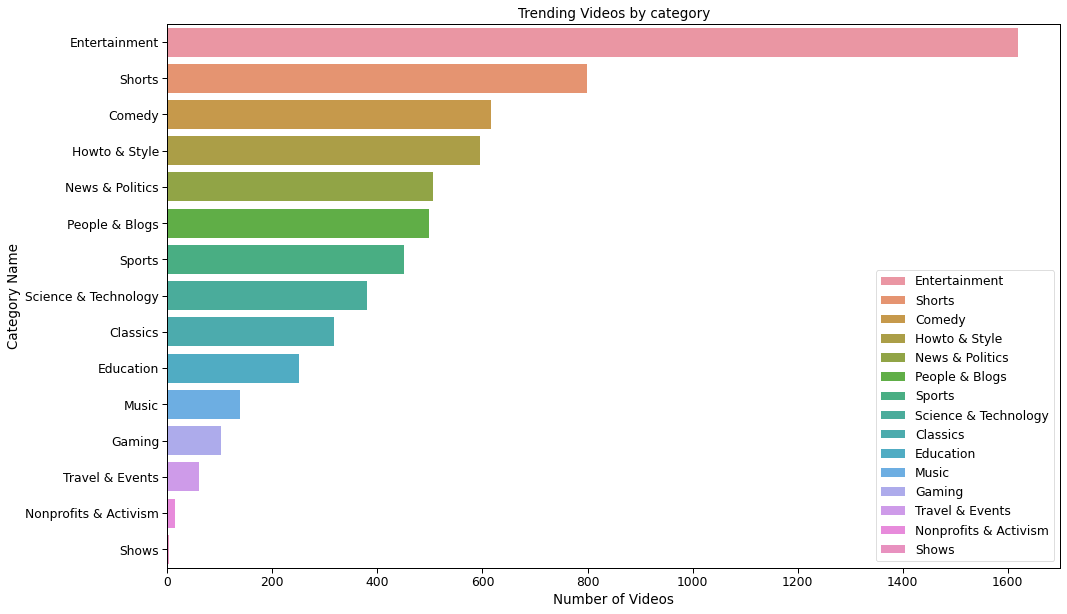

In [78]:
category = dict(df.category_name.value_counts())
x_plot = list(category.keys())
y_plot = list(category.values())

plt.figure(figsize=(16,10))
cats = sns.barplot(x=y_plot, y=x_plot, estimator=np.median, hue=x_plot, dodge=False, orient = 'h')
cats.set_title('Trending Videos by category')
cats.set_ylabel('Category Name')
cats.set_xlabel('Number of Videos')



### 7. Which day of the week had the most trending videos?
<br><font face="Times New Roman" size='4'>Draw a bar graph: (Number of videos) X (Day of the week)</font>

#### todo's
- convert the type to timeseries
- then make a df with each day of the week with number of videos
- plot it

In [79]:
df.trending_date = df.trending_date.str.replace('.','-')
df.trending_date = '20' + df.trending_date.astype(str)
df.trending_date = pd.to_datetime(df.trending_date, yearfirst=True, format='%Y-%d-%m')
#df.dtypes
#df.head()

Text(0, 0.5, 'Number of Videos')

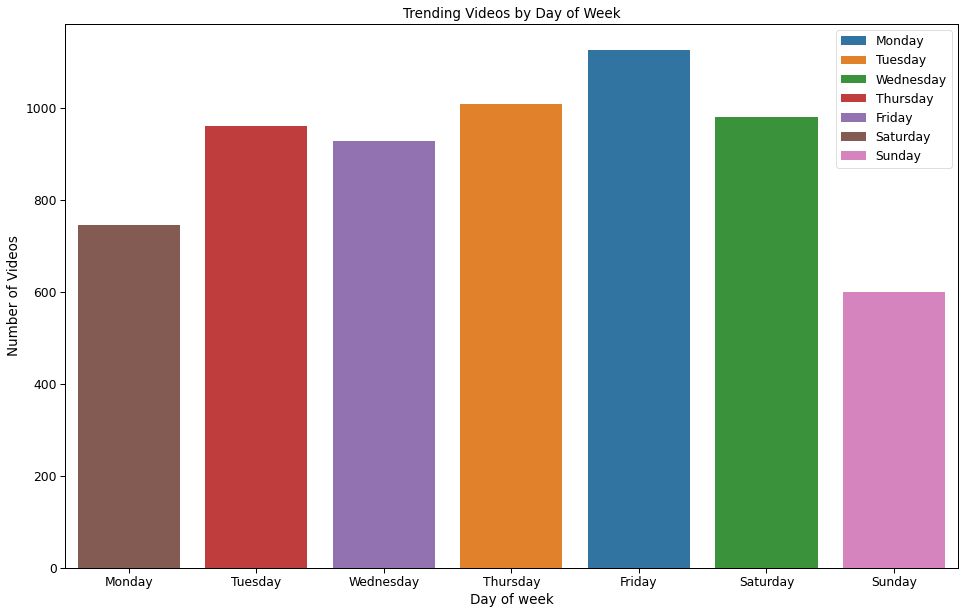

In [80]:
# make new column in dataframe
df['day_of_week'] = df.trending_date.dt.dayofweek
# df.tail()
most_vids_per_day = dict(df['day_of_week'].value_counts())
x_plot = list(most_vids_per_day.keys())
y_plot = list(most_vids_per_day.values())

x_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(16,10))
days = sns.barplot(x=x_plot, y=y_plot, estimator=np.median, hue=x_labels, dodge=False)
days.set(xticklabels=x_labels)
days.set_title('Trending Videos by Day of Week')
days.set_xlabel('Day of week')
days.set_ylabel('Number of Videos')


### 8. What's the best time of the day to publish a video?
<br><font face="Times New Roman" size='4'>Draw a bar graph: (Number of videos) X (Hour of the day)</font>

In [81]:
## data cleaning

# cleaning the string before changing it
df.publish_time = df.publish_time.str.replace('T',' ')
df.publish_time = df.publish_time.str.replace('Z','')
df.publish_time = df.publish_time.str.replace('.000','')

df.publish_time = pd.to_datetime(df.publish_time, yearfirst=True, format='%Y-%m-%d %H:%M:%S')
### used for debugging ###
df.dtypes
#df.head()


video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
category_name                     object
day_of_week                        int64
dtype: object

Text(0.5, 0, 'Time')

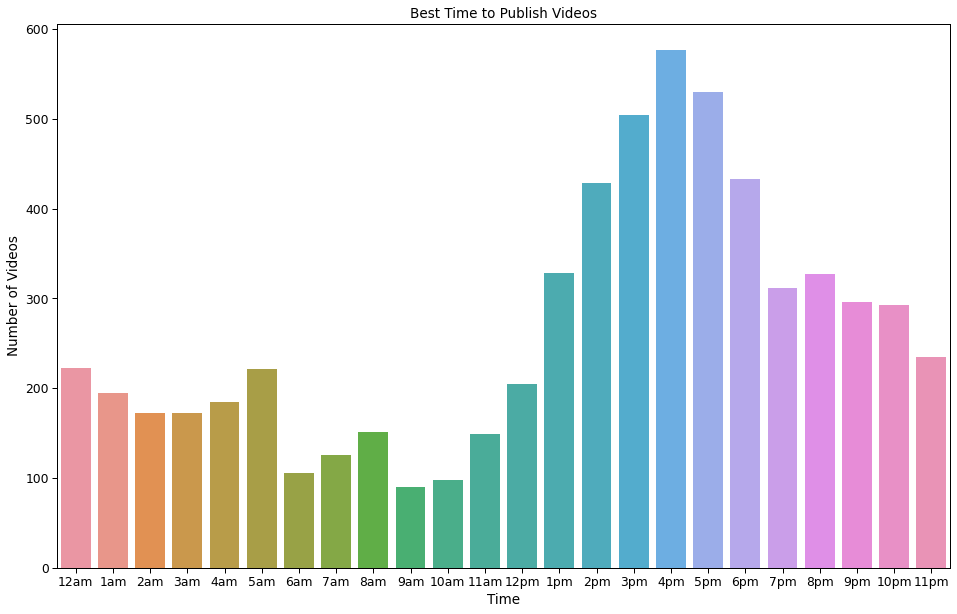

In [82]:
# going to try and use .hour
best_hours = dict(df.publish_time.dt.hour.value_counts())
x_plot = list(best_hours.keys())
y_plot = list(best_hours.values())

plt.figure(figsize=(16,10))
hours = sns.barplot(x=x_plot, y=y_plot, estimator=np.median, dodge=False)
hours.set(xticklabels=['12am','1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am','9am', '10am', '11am', '12pm',
                     '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm','9pm', '10pm', '11pm'])
hours.set_title('Best Time to Publish Videos')
hours.set_ylabel('Number of Videos')
hours.set_xlabel('Time')

### 9. Top ten most used tags


Not sure what the Pandas syntax is for this. But the pure numpy solution, which would be quite fast, would be to flatten your collection of arrays with np.flatten() and then call the histogram function. This would return a numpy array as a result, which could be wrapped into a Series with one line.


In [83]:
# to do: 
# convert to array of tags
# value_counts the tags, and then plot
df.tags = df.tags.str.split('|')
#df.tags = df.tags.str.strip('"')
#all_tags = np.array(df.tags)
#df.dtypes

In [84]:
tags = pd.Series([x for sublist in df.tags for x in sublist]).value_counts()
tags

"funny"            632
"comedy"           512
"humor"            279
[none]             265
"comedian"         229
                  ... 
"march 2018"         1
"hot metal"          1
"rochdale"           1
"bts style"          1
"canada dinner"      1
Length: 57569, dtype: int64

In [85]:
plotting = tags[0:11].to_dict()
del plotting['[none]']
plotting


{'"funny"': 632,
 '"comedy"': 512,
 '"humor"': 279,
 '"comedian"': 229,
 '"celebrities"': 211,
 '"interview"': 204,
 '"music"': 199,
 '"funny video"': 196,
 '"how to"': 193,
 '"celebrity"': 193}

Text(0, 0.5, 'Number of times used')

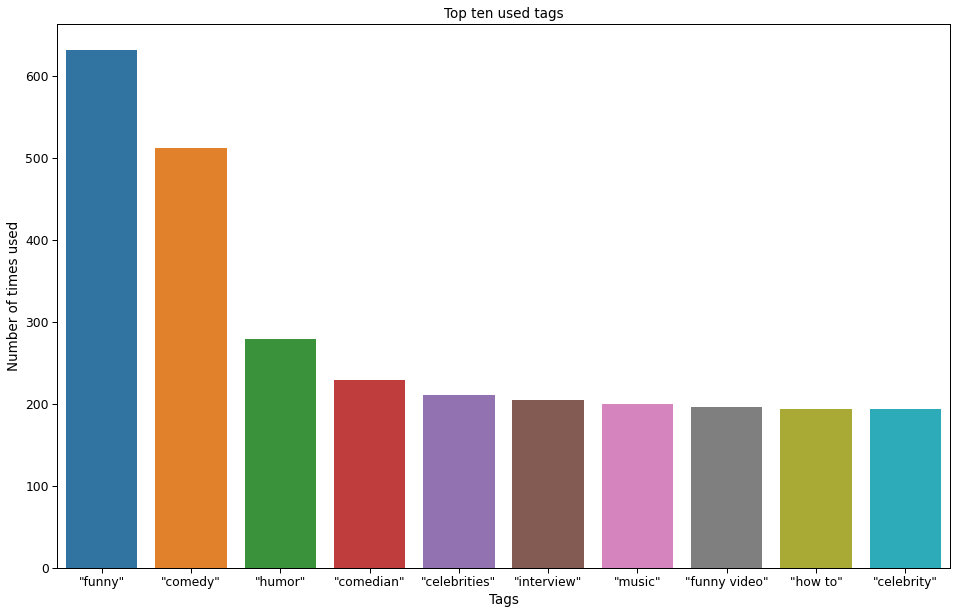

In [86]:
x_plot = list(plotting.keys())
y_plot = list(plotting.values())

plt.figure(figsize=(16,10))
hours = sns.barplot(x=x_plot, y=y_plot, estimator=np.median, dodge=False)
hours.set_title('Top ten used tags')
hours.set_xlabel('Tags')
hours.set_ylabel('Number of times used')

### 10. Draw a 2x2 scatter charts showing likes, dislikes (Y-axis) X views , comments (X-axis)
#### Give conclusions from the charts

<AxesSubplot:xlabel='comment_count', ylabel='dislikes'>

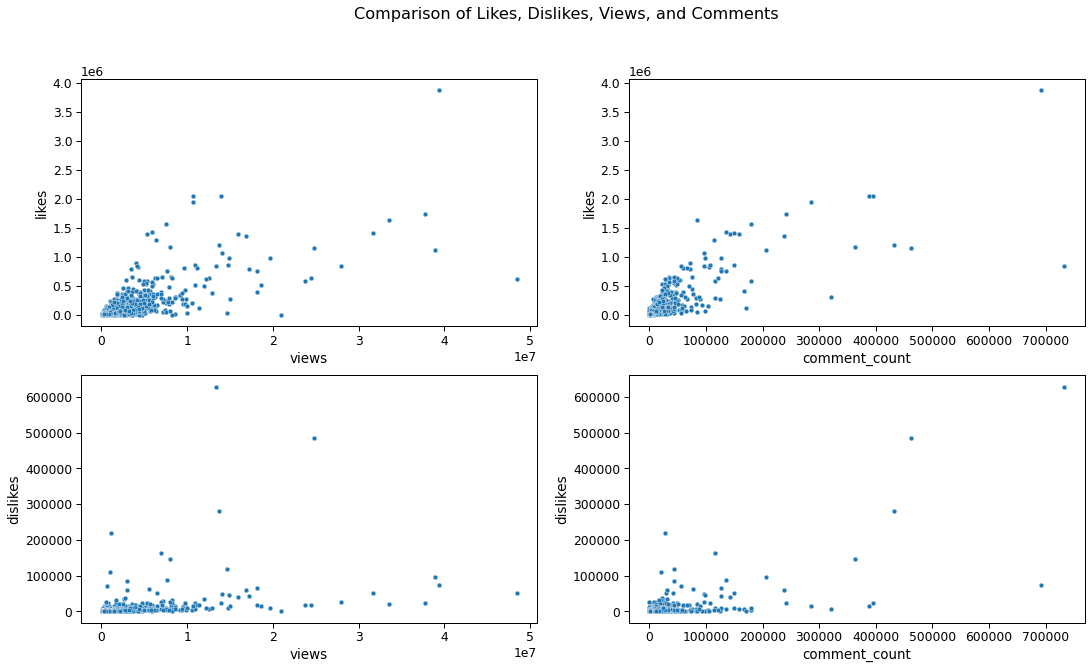

In [87]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Comparison of Likes, Dislikes, Views, and Comments')

sns.scatterplot(ax=axes[0, 0], data=df, x='views', y='likes')
sns.scatterplot(ax=axes[0, 1], data=df, x='comment_count', y='likes')
sns.scatterplot(ax=axes[1, 0], data=df, x='views', y='dislikes')
sns.scatterplot(ax=axes[1, 1], data=df, x='comment_count', y='dislikes')

### 11. Your question(s)

### How much money did the top 5 videos make? 
#### assuming the channels make: $2.5 USD per 1000 views

In [88]:
most_views = df.sort_values(by=['views'], ascending=False)
most_views.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,day_of_week
23824,-BQJo3vK8O8,2018-03-15,Maluma - El Préstamo (Official Video),MalumaVEVO,10,2018-03-09 11:00:01,"[Maluma Music, ""Maluma Official Video"", ""Malum...",48431654,609101,52259,29172,https://i.ytimg.com/vi/-BQJo3vK8O8/default.jpg,False,False,False,Maluma - El Prestamo (Official Music Video)\nE...,Shorts,3
35550,7C2z4GqqS5E,2018-05-19,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18 09:00:02,"[BIGHIT, ""빅히트"", ""방탄소년단"", ""BTS"", ""BANGTAN"", ""방탄""]",39349927,3880071,72707,692305,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Shorts,5
28605,i0p1bmr0EmE,2018-04-14,TWICE What is Love? M/V,jypentertainment,10,2018-04-09 08:59:51,"[TWICE What is Love, ""TWICE What is Love?"", ""T...",38873543,1111592,96407,206632,https://i.ytimg.com/vi/i0p1bmr0EmE/default.jpg,False,False,False,TWICE(트와이스) What is Love? M/V\n\nSpotify https...,Shorts,5
3200,6ZfuNTqbHE8,2017-11-30,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29 13:26:24,"[marvel, ""comics"", ""comic books"", ""nerdy"", ""ge...",37736281,1735895,21969,241237,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,Entertainment,3
70,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"[edsheeran, ""ed sheeran"", ""acoustic"", ""live"", ...",33523622,1634124,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Shorts,1


Text(0.5, 0, 'Money in ($)USD')

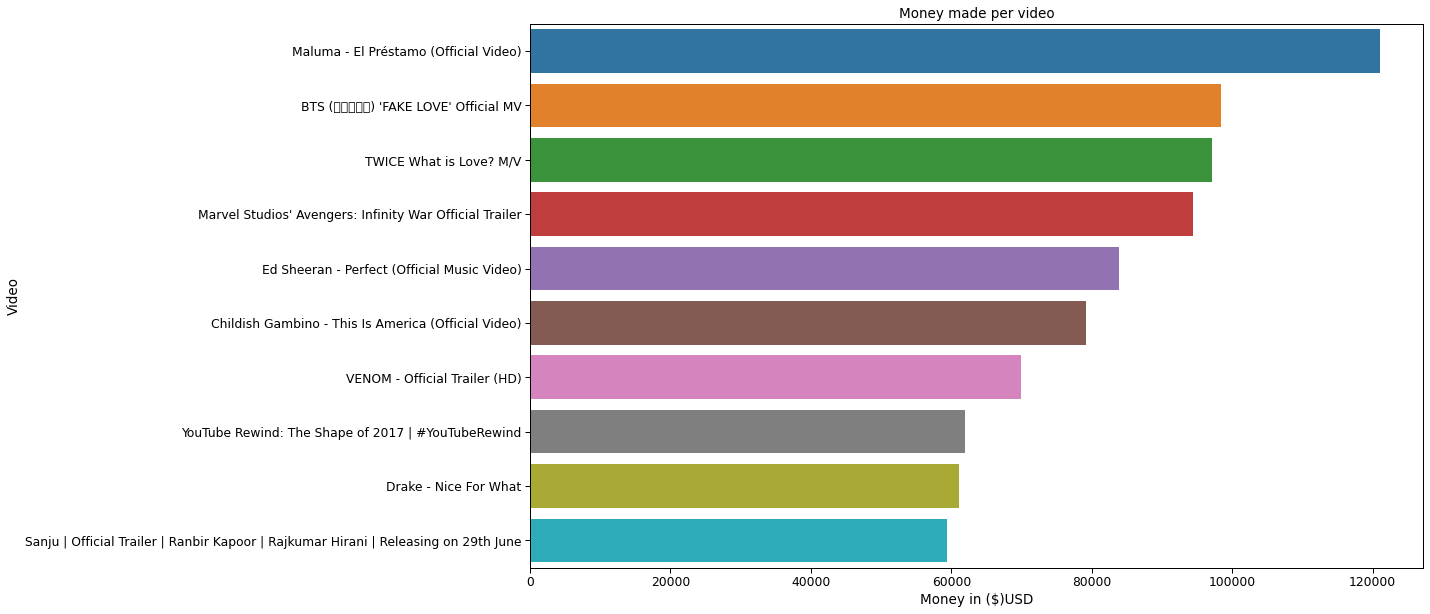

In [89]:
import warnings
warnings.filterwarnings("ignore")

money_made = [((x / 1000) * 2.5) for x in most_views.views]
titles = [ x for x in most_views.title]

plt.figure(figsize=(16,10))
money = sns.barplot(x=money_made[:10], y=titles[:10], estimator=np.median, dodge=False)
money.set_title('Money made per video')
money.set_ylabel('Video')
money.set_xlabel('Money in ($)USD')